In [4]:
# Load Data from shipping training csv
import pandas as pd
data = pd.read_csv("./Train.csv")

In [5]:
data.head(10)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
5,6,F,Flight,3,1,162,3,medium,F,12,1417,1
6,7,D,Flight,3,4,250,3,low,F,3,2371,1
7,8,F,Flight,4,1,233,2,low,F,48,2804,1
8,9,A,Flight,3,4,150,3,low,F,11,1861,1
9,10,B,Flight,3,2,164,3,medium,F,29,1187,1


In [6]:
# Check to see if the data is clean we do this by checking if any of the columns have any row with null data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [8]:
# As part of the check to investigate the data we are looking at the numerical columns ans running describe on it
data.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [9]:
# the product_importance column on the kaggle sheet referred to "low" "medium" and "others" we wanted to see what "others" was referring to
data["Product_importance"].value_counts()

low       5297
medium    4754
high       948
Name: Product_importance, dtype: int64

In [15]:
# For data visualization we need to import the data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Product_importance'>

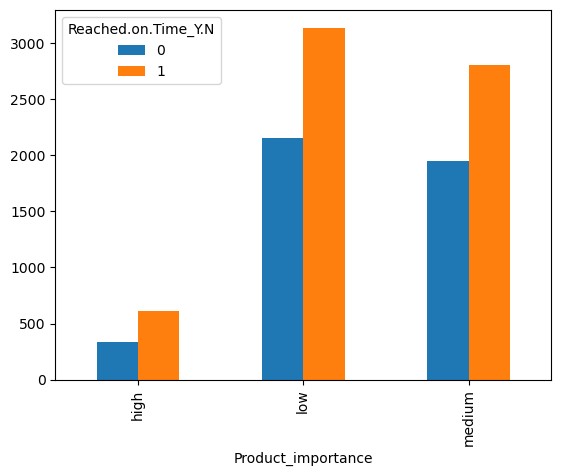

In [16]:
# As part int64of the explorative analysis we wanted to see the impact of "Product_importance" on the "Reached.on.Time_Y.N". We believe products with high importance shoudld be mostly delivered on time
CrosstabResult=pd.crosstab(index=data['Product_importance'],columns=data['Reached.on.Time_Y.N'])
%matplotlib inline
CrosstabResult.plot.bar()

In [17]:
# We wanted to see the warebouse block description in counts
block_counts = data['Warehouse_block'].value_counts()
print(block_counts)

F    3666
D    1834
A    1833
B    1833
C    1833
Name: Warehouse_block, dtype: int64


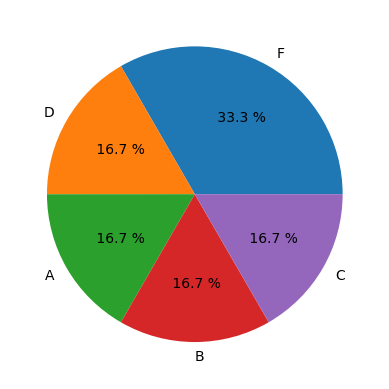

In [18]:
# to visualize the data above weopted for the pie chart as it was the best option for seeing data distribuition
plt.pie(block_counts, labels = block_counts.index, autopct ='% 1.1f %%')
plt.show()

<Axes: xlabel='Warehouse_block'>

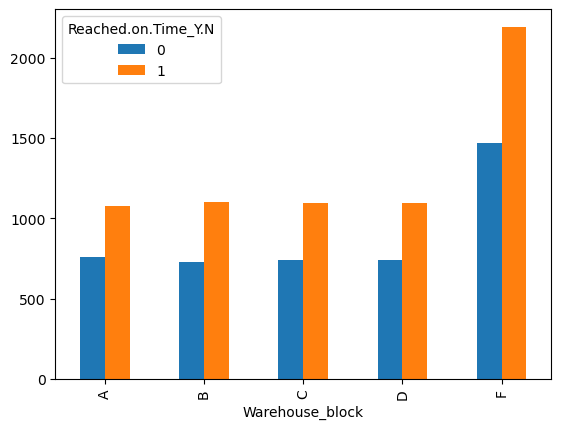

In [19]:
# We wanted ot visualize if the warehouse block have an effect on delivery getting to the destination on time
CrosstabResult=pd.crosstab(index=data['Warehouse_block'],columns=data['Reached.on.Time_Y.N'])
%matplotlib inline
CrosstabResult.plot.bar()

<Axes: xlabel='Mode_of_Shipment'>

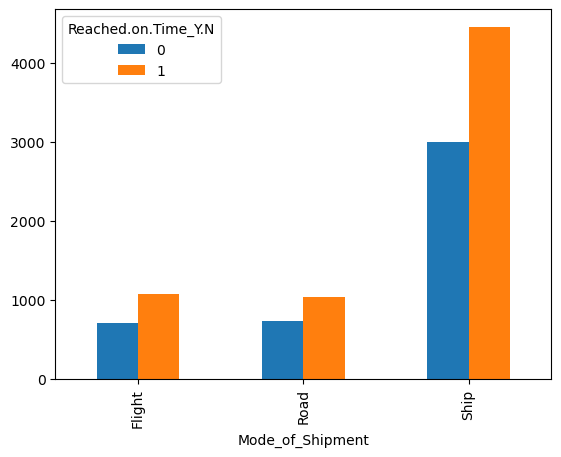

In [20]:
# We wanted to see if there was an major deviation on delivery timeline based on mode if shipment
CrosstabResult=pd.crosstab(index=data['Mode_of_Shipment'],columns=data['Reached.on.Time_Y.N'])
%matplotlib inline
CrosstabResult.plot.bar()

<Axes: xlabel='Mode_of_Shipment'>

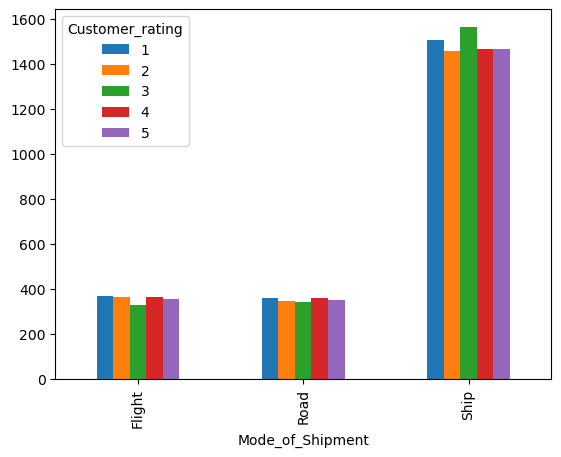

In [21]:
# We wanted to visualize the effect of mode of shipment on customer rating. This is to see if customers have a beter experience uing any of the mode of shipment
CrosstabResult=pd.crosstab(index=data['Mode_of_Shipment'],columns=data['Customer_rating'])
%matplotlib inline
CrosstabResult.plot.bar()